In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from main import Main

/Users/suchanuchpiriyasatit/.pyenv/versions/3.7.9/envs/lfd-gdn/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pickle
with open('main.pkl', 'rb') as f:
    gdn = pickle.load(f)

In [4]:
gdn.model

GDN(
  (embedding): Embedding(5, 64)
  (bn_outlayer_in): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (gnn_layers): ModuleList(
    (0): GNNLayer(
      (gnn): GraphLayer(50, 64, heads=1)
      (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (leaky_relu): LeakyReLU(negative_slope=0.01)
    )
  )
  (out_layer): OutLayer(
    (mlp): ModuleList(
      (0): Linear(in_features=64, out_features=1, bias=True)
    )
  )
  (dp): Dropout(p=0.2, inplace=False)
)

In [11]:
from evaluate import (
    get_err_scores, get_best_performance_data, 
    get_val_performance_data, get_full_err_scores,
    get_anomaly_predictions
)

test_predicted, test_ground, test_labels = gdn.test_result
val_predicted, val_ground, val_labels = gdn.val_result
test_predicted = np.array(test_predicted)
test_labels = np.array(test_labels)[:, 0]
test_ground = np.array(test_ground)

test_scores, normal_scores = get_full_err_scores(gdn.test_result, gdn.val_result)
pred, thres, sensor_idx = get_anomaly_predictions(test_scores, test_labels, topk=1)

# top1_best_info = get_best_performance_data(test_scores, test_labels, topk=1) 

total_err len
(5, 65437)
[0.         0.         0.         ... 2.24280426 2.2392134  2.23553067]


/Users/suchanuchpiriyasatit/.pyenv/versions/3.7.9/envs/lfd-gdn/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0, 0.0, 0.6885929422358292, 3.2262952947653813)

In [37]:
test_scores.shape

(5, 65437)

In [27]:
test_predicted.shape

(65437, 5)

In [20]:
top1_best_info = get_best_performance_data(test_scores, test_labels, topk=1) 

total_err len
(5, 65437)
[0.         0.         0.         ... 2.24280426 2.2392134  2.23553067]


In [83]:
top1_best_info

(0.7309021556955442,
 0.602079485079885,
 0.9298844151642599,
 0.6885929422358292,
 0.0001065706318829404)

In [17]:
test_predicted_transformed = gdn.normalizer.inverse_transform(test_predicted)
test_ground_transformed = gdn.normalizer.inverse_transform(test_ground)

In [133]:
df = pd.read_csv('data/WELL-00002-updated/test.csv', index_col=0)

In [149]:
df.start.sum()

6

In [150]:
df['class'].value_counts()

1    34101
0    31636
Name: class, dtype: int64

In [134]:
df.describe()

,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,start,class
count,6.573700e+04,65737.000000,6.573700e+04,65737.000000,6.573700e+04,65737.000000,65737.000000
mean,1.375568e+07,118.574506,3.691947e+06,108.271141,4.574238e+06,0.000091,0.518749
std,1.291059e+06,0.470870,1.817455e+06,40.346812,1.745161e+05,0.009553,0.499652
min,1.258818e+07,117.418700,1.629007e+06,80.851490,4.267824e+06,0.000000,0.000000
25%,1.283688e+07,118.590500,2.505489e+06,83.064950,4.447683e+06,0.000000,0.000000
50%,1.304702e+07,118.720900,2.905014e+06,83.419560,4.572728e+06,0.000000,1.000000
75%,1.446344e+07,118.903000,4.843655e+06,173.096100,4.725116e+06,0.000000,1.000000
max,1.715663e+07,119.137400,8.192052e+06,173.096100,4.878340e+06,1.000000,1.000000


In [68]:
df = pd.read_csv('data/WELL-00002-updated/test.csv', index_col=0)
df.start.sum()
df[df['class']!=1]

,timestamp,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,start,class
0,2014-02-12 17:03:33.000000,12804630.0,118.7102,2514857.0,83.49664,4802594.0,1,0
1,2014-02-12 17:03:34.000000,12804800.0,118.7104,2514857.0,83.49661,4802581.0,0,0
2,2014-02-12 17:03:35.000000,12804970.0,118.7106,2514857.0,83.49659,4802568.0,0,0
3,2014-02-12 17:03:36.000000,12805130.0,118.7108,2514856.0,83.49656,4802555.0,0,0
4,2014-02-12 17:03:37.000000,12805300.0,118.7110,2514856.0,83.49654,4802542.0,0,0
...,...,...,...,...,...,...,...,...
48519,2014-01-26 20:19:43.000000,17131540.0,117.4372,8161346.0,173.09610,4566887.0,0,0
48520,2014-01-26 20:19:44.000000,17131410.0,117.4373,8157934.0,173.09610,4566857.0,0,0
48521,2014-01-26 20:19:45.000000,17131280.0,117.4374,8154522.0,173.09610,4566828.0,0,0
48522,2014-01-26 20:19:46.000000,17131150.0,117.4375,8151110.0,173.09610,4566798.0,0,0


In [23]:
from visualization import plot_by_instances
# plot_by_instances(df)

In [99]:
df.columns

Index(['timestamp', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-JUS-CKGL',
       'start', 'class'],
      dtype='object')

In [91]:
def get_abnormal_segment(test_labels):
    
    ab_idx = np.argwhere(test_labels==1)[:,0]
    idx = [ab_idx[0]]
    for i, idxx in enumerate(ab_idx[1:]):
        if idxx-ab_idx[i]!=1:
            idx.append(idxx)
    return idx

get_abnormal_segment(test_labels)

[14968, 29648, 45721, 48324]

In [79]:
def plot(s, t, thresh=top1_best_info[-1]):
    
    n = t - s
    xs = np.arange(n)
    n_features = 5
    fig, axs = plt.subplots(n_features, 1, figsize=(15, 15))
    cols = ['P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-JUS-CKGL']
    plt.tight_layout()
    for i in range(n_features):
        axs[i].set_title(cols[i], fontdict={'fontsize': 18,})
        

        axs[i].plot(xs, test_ground[s:t,i], '-', label='groud truth', color='#1f77b4')
        axs[i].plot(xs, test_predicted[s:t,i], '-', label='predicted', color='black')
        ymin, ymax = axs[i].get_ylim()
#         axs[i].fill_between(range(n), ymin-0.05, ymax+0.05, where=(test_labels[s:t]!=0),
#                         color='red', alpha=0.1, label='abnormal timesteps')
        axs[i].fill_between(range(n), ymin-0.005, ymax+0.005, where=(test_scores[i,s:t]>thresh),
                        color='red', alpha=0.1, label='predicted abnormal')
        axs[i].legend(prop={'size':16})
    plt.tight_layout()
        


In [ ]:
p

In [88]:
def plot_error(s, t, thresh=top1_best_info[-1]):
    n = t - s
    xs = np.arange(n)
    n_features = 5
    # poi_predicted = 
    fig, axs = plt.subplots(n_features, 1, figsize=(15, 15))
    cols = ['P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-JUS-CKGL']
    plt.tight_layout()
    for i in range(n_features):
        axs[i].set_title(cols[i], fontdict={'fontsize': 18,})
        axs[i].axhline(thresh, label='anomaly threshold', color='red')

        axs[i].plot(xs, test_scores[i,s:t], '-', label='normalized error', color='black')
#         axs[i].plot(xs[(test_labels[s:t]!=0)], test_ground[s:t,i][(test_labels[s:t]!=0)], '-',color='red', label='groud truth (abnormal)')
#         axs[i].plot(xs, test_predicted[s:t,i], '-', label='predicted', color='black')
        ymin, ymax = axs[i].get_ylim()
#         axs[i].fill_between(range(n), ymin-0.05, ymax+0.05, where=(test_labels[s:t]!=0),
#                         color='red', alpha=0.1, label='abnormal timesteps')
        axs[i].fill_between(range(n), ymin-0.005, ymax+0.005, where=(test_scores[i,s:t]>thresh),
                        color='red', alpha=0.1, label='predicted abnormal')
        axs[i].legend(prop={'size':22})
    
    plt.tight_layout()
        


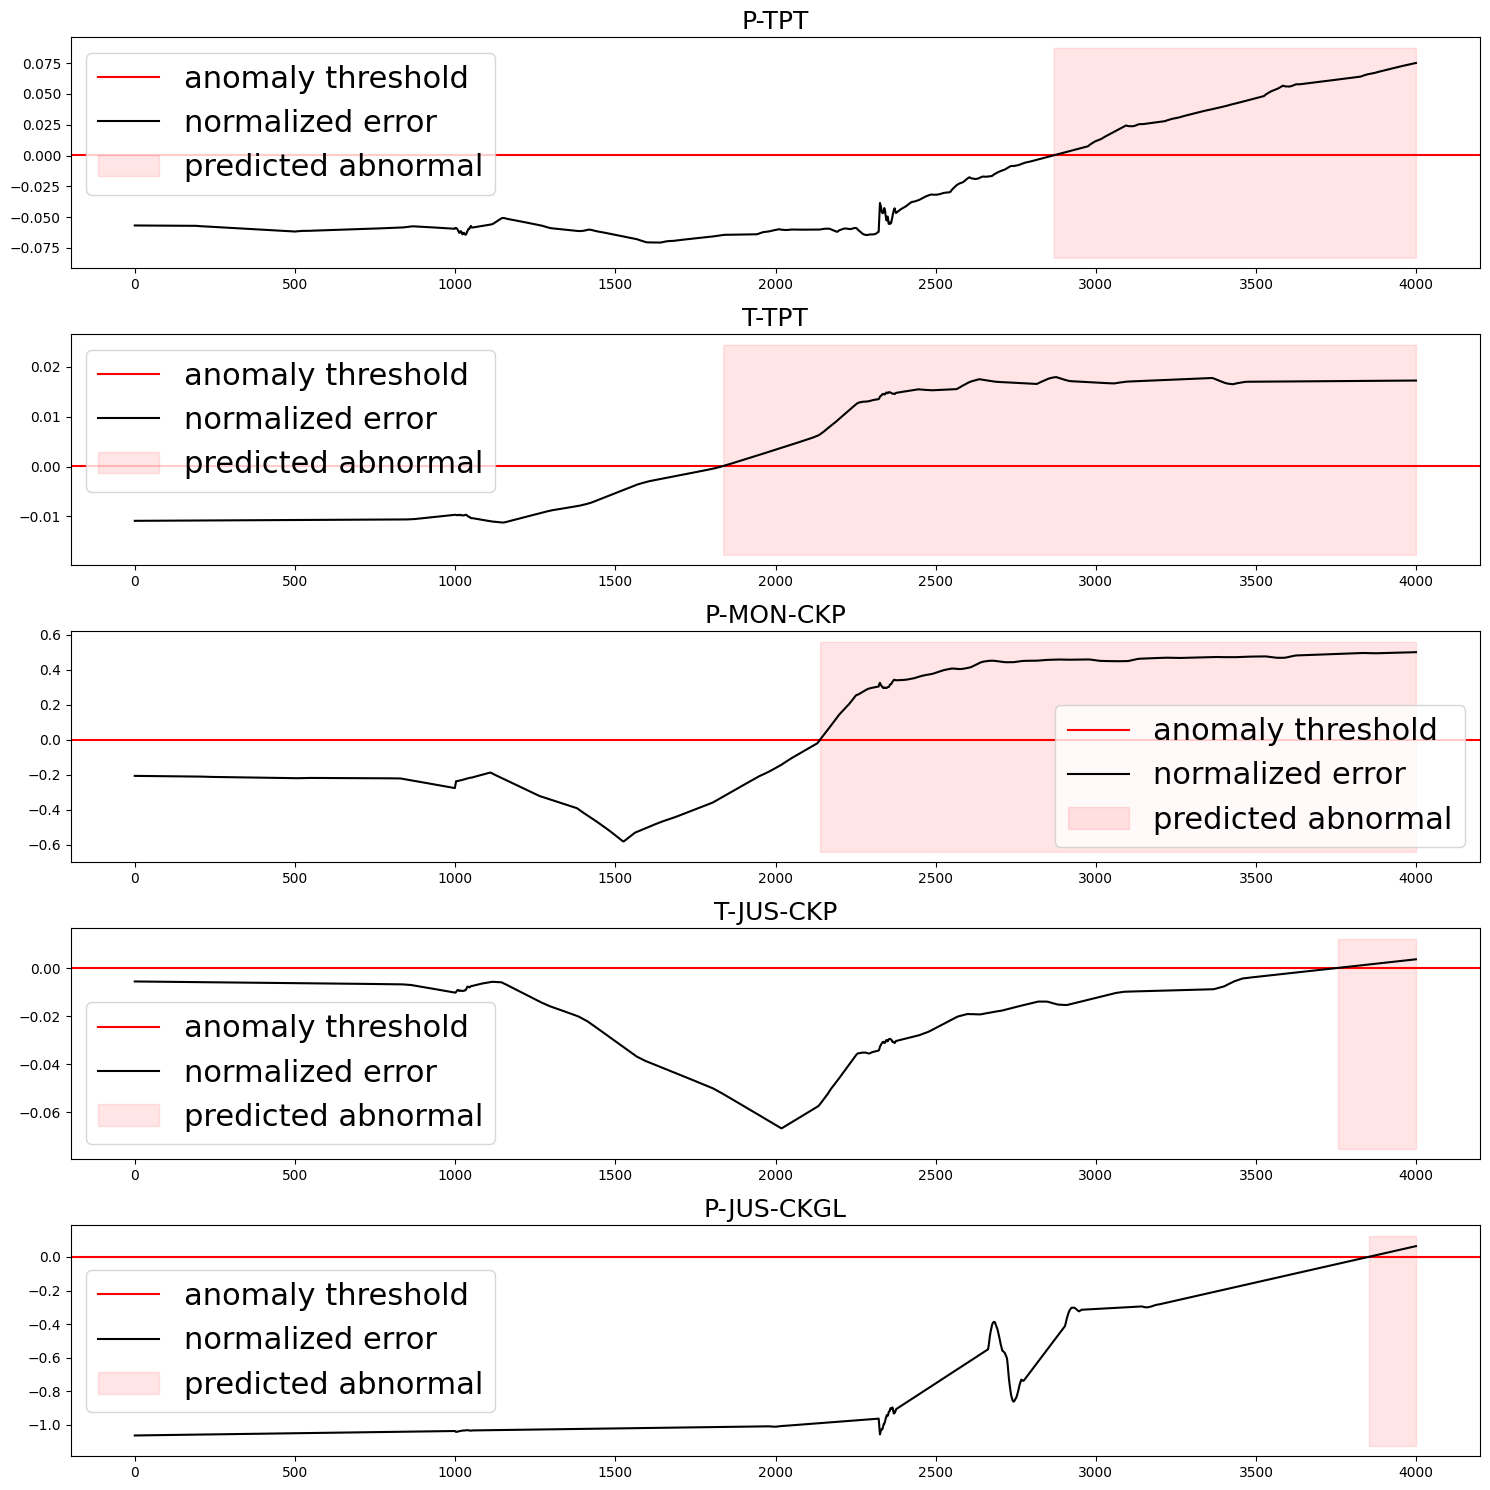

In [89]:
plot_error(28648, 32648)

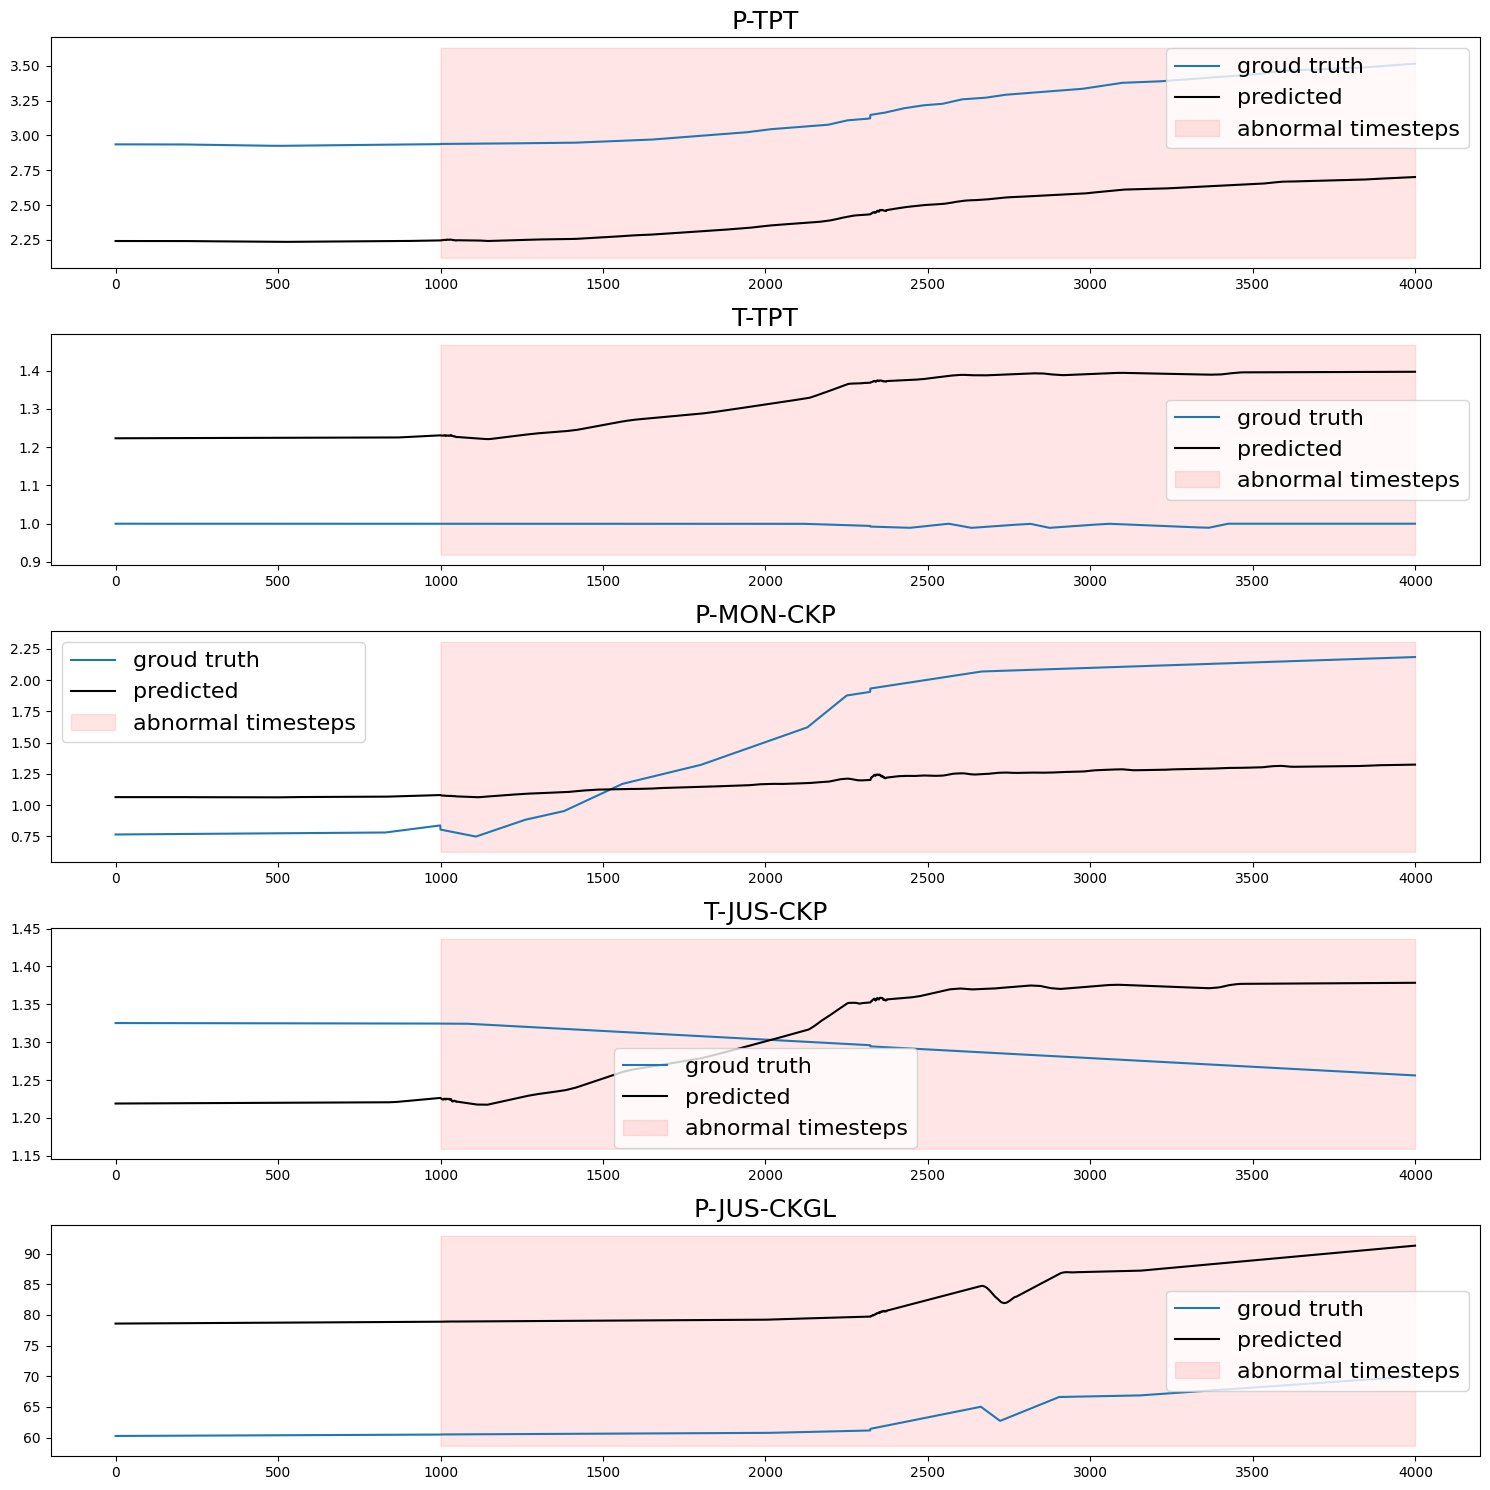

In [69]:
plot(28648, 32648)
# plot(47721, 49721)

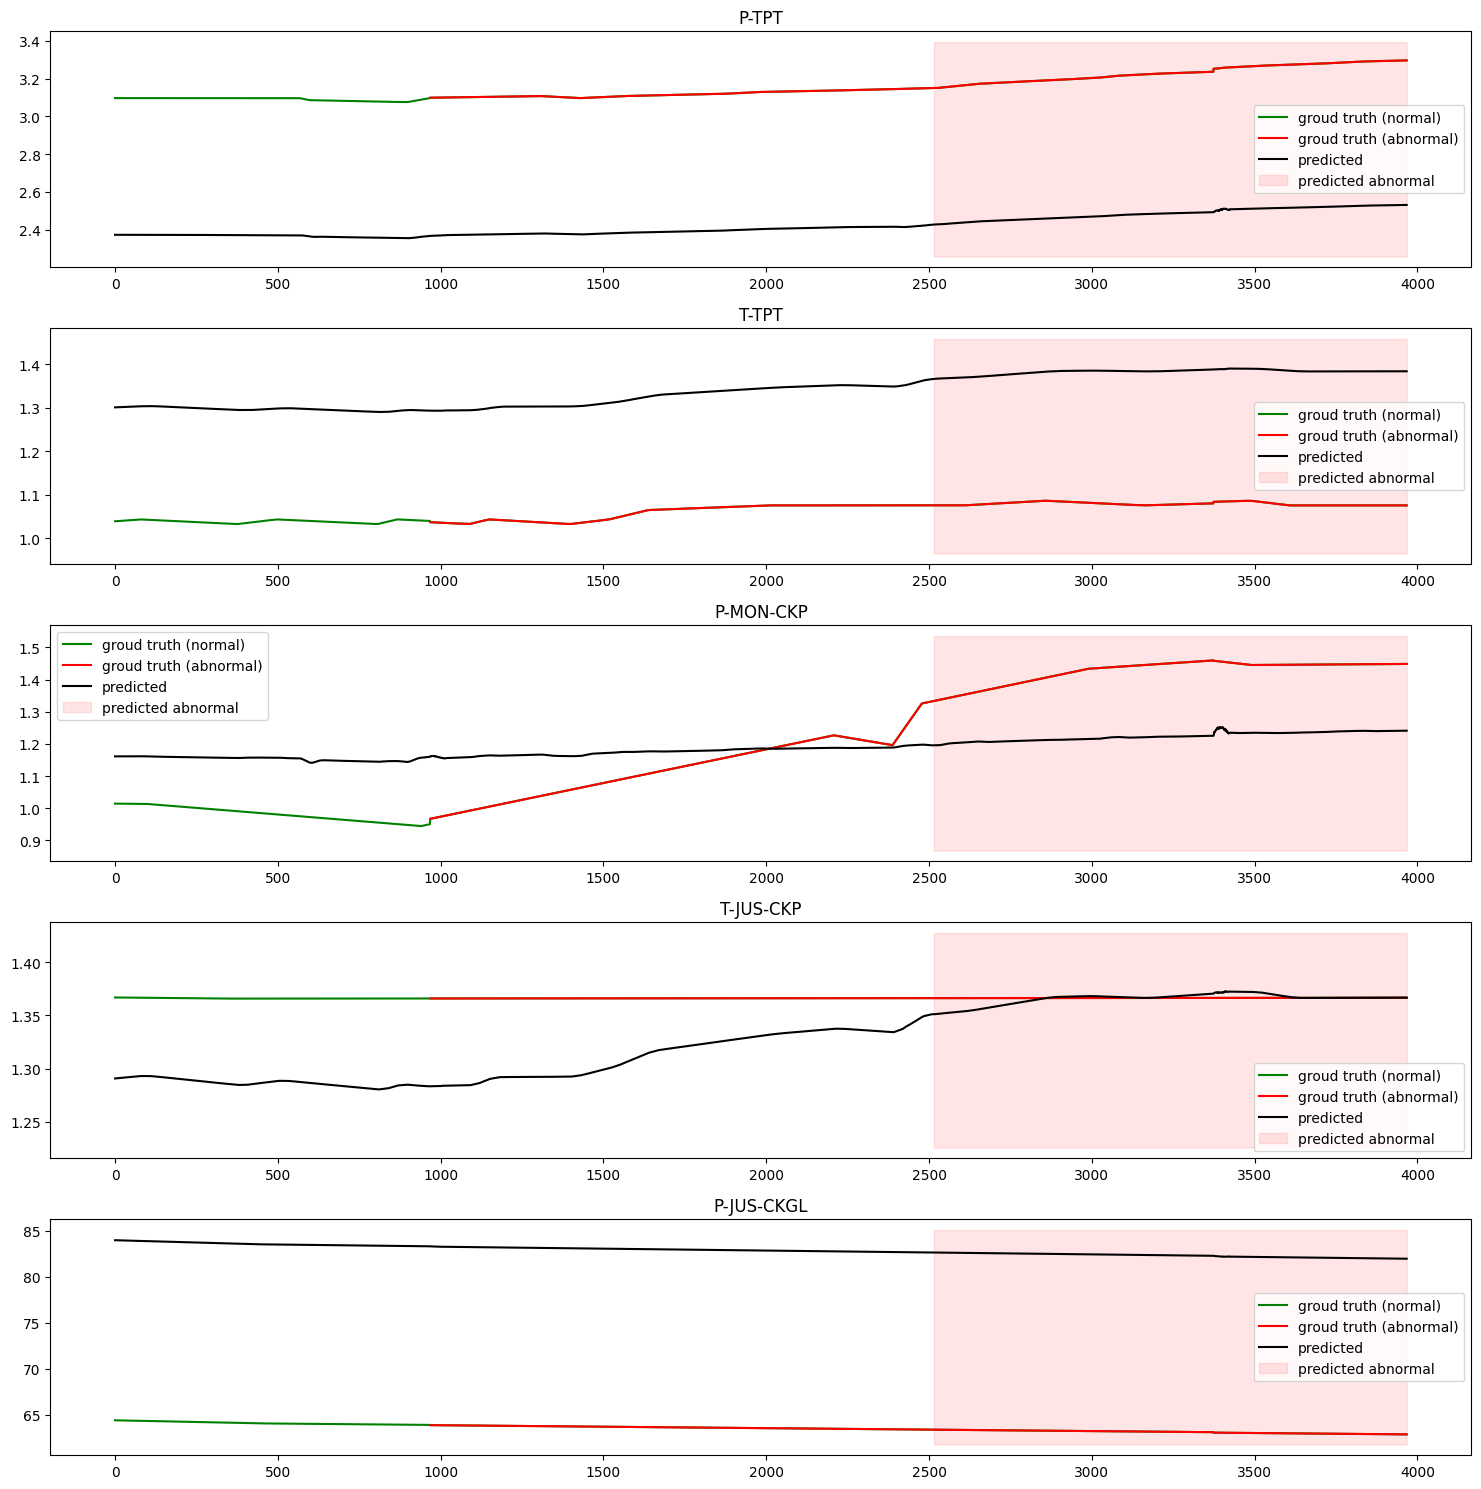

In [145]:
sensor_idx[0][28648:32648]#[28648:]

plot(14000, 17968)

In [173]:
!ls data

WELL-00001         WELL-00003         WELL-00015         msl
WELL-00001-updated WELL-00004         WELL-00016
WELL-00002         WELL-00005         WELL-00017
WELL-00002-updated WELL-00006         data.zip


In [175]:
dff = pd.read_csv('data/WELL-00002-updated/test.csv')
dff[dff.start==1]

,Unnamed: 0,timestamp,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,start,class
0,0,2014-02-12 17:03:33.000000,12804630.0,118.7102,2514857.0,83.49664,4802594.0,1,0
24131,24131,2014-03-25 17:03:04.000000,12608130.0,118.6839,2118789.0,82.60818,4577584.0,1,0
36008,36008,2014-03-01 15:17:00.000000,13021140.0,119.0886,1915686.0,84.26860,4767926.0,1,0
47386,47386,2014-01-26 20:00:50.000000,17144370.0,117.4676,8157933.0,173.09610,4600253.0,1,0
58023,58023,2014-01-26 14:01:24.000000,16206110.0,117.6140,7544006.0,173.09610,4626504.0,1,1
65140,65140,2014-01-22 02:00:51.000000,16302130.0,117.5668,7562536.0,173.09610,4495393.0,1,1


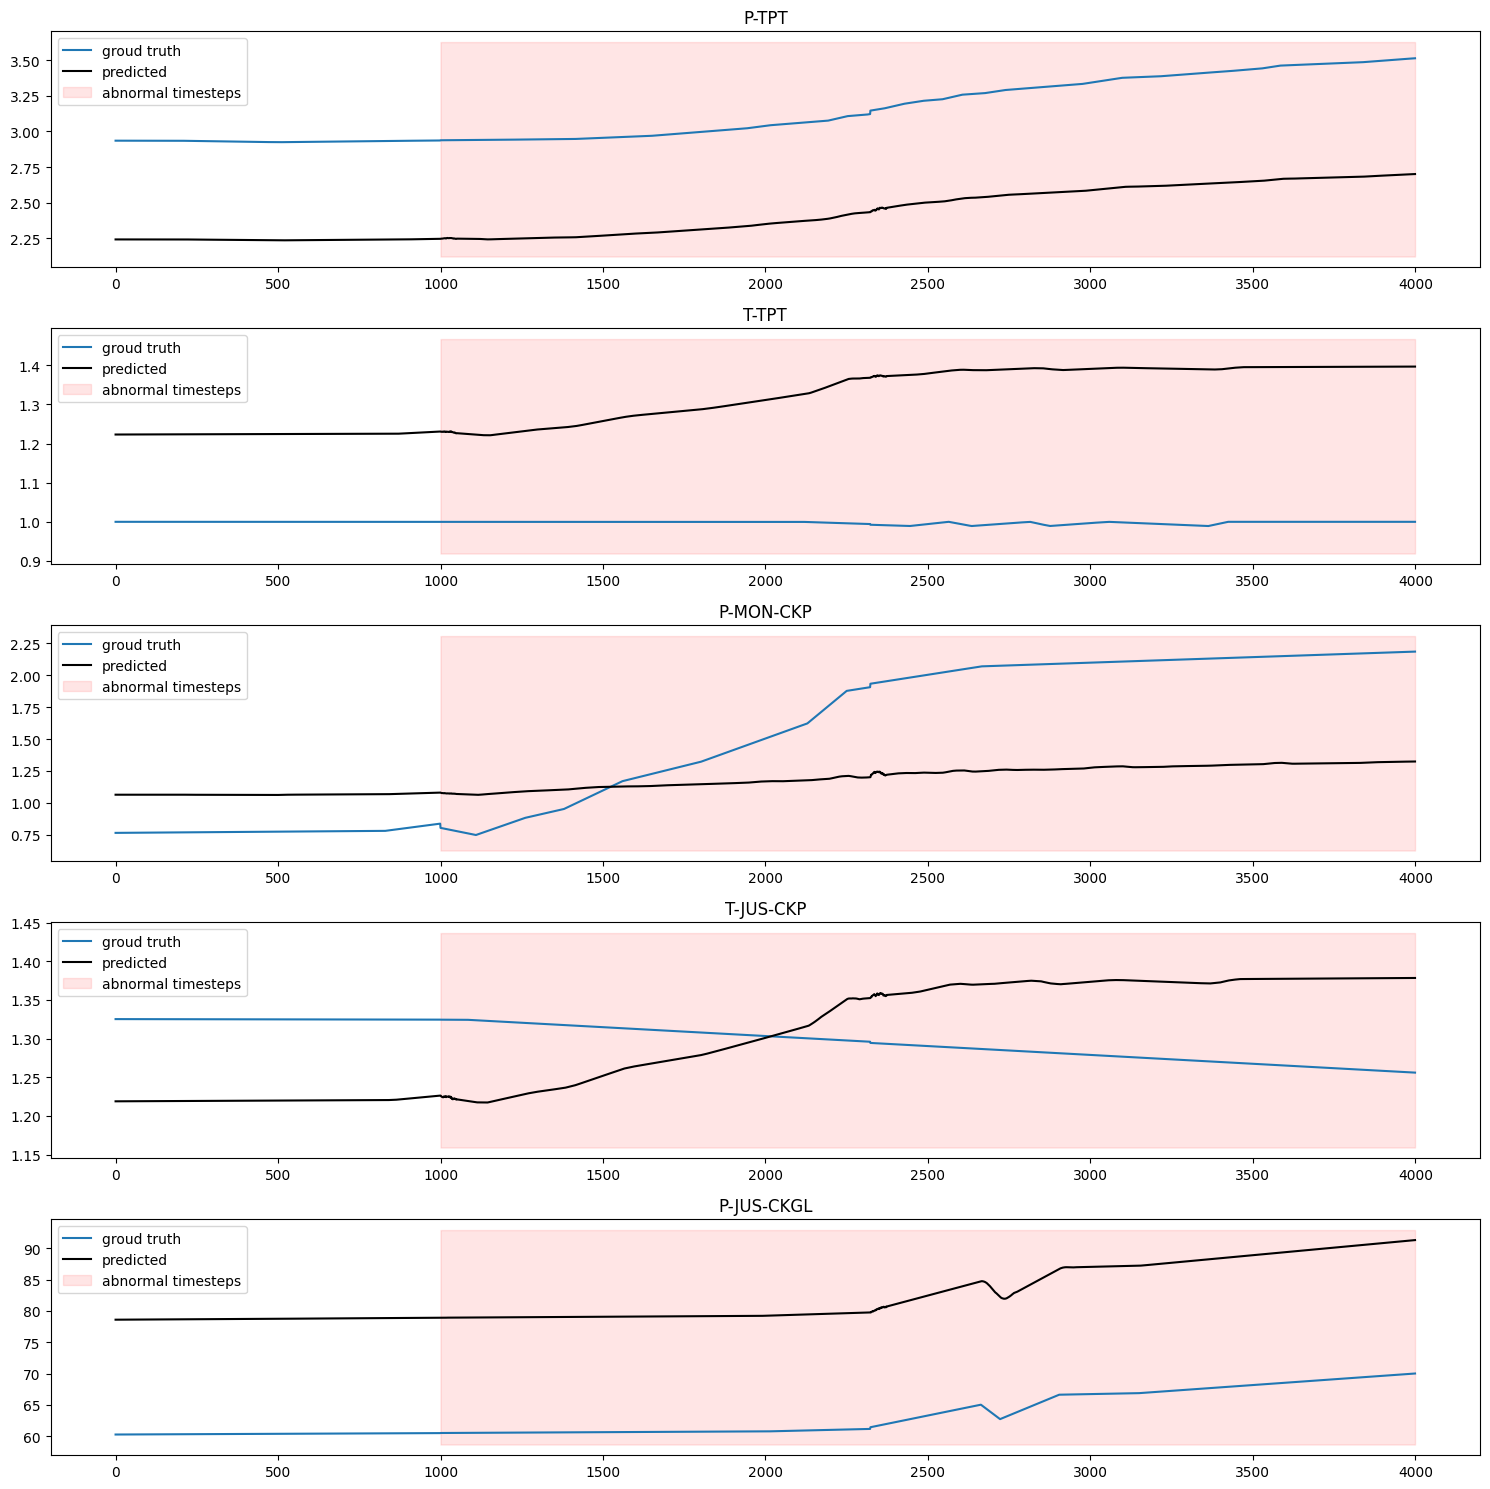

In [164]:
plot(28648, 32648)

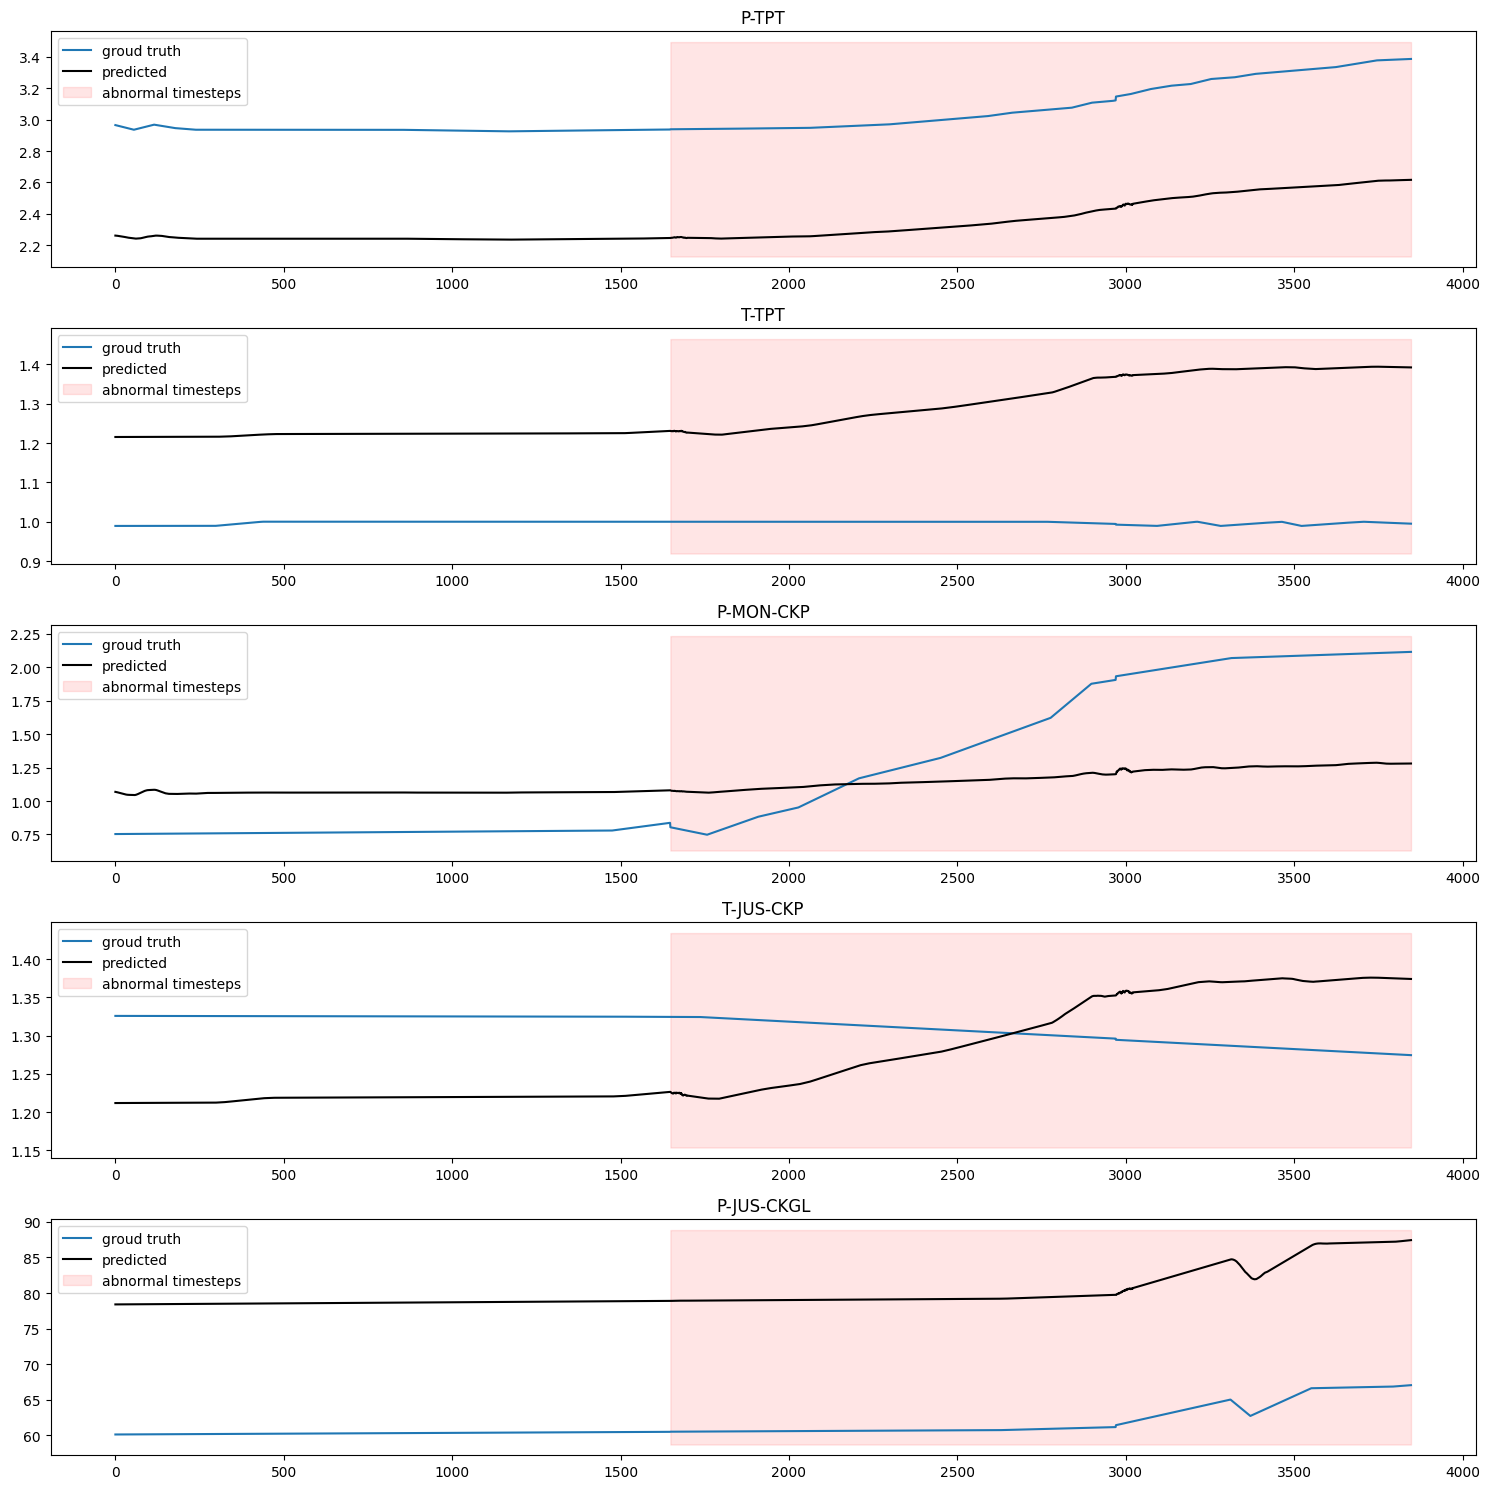

In [167]:
plot(28000, 31848)

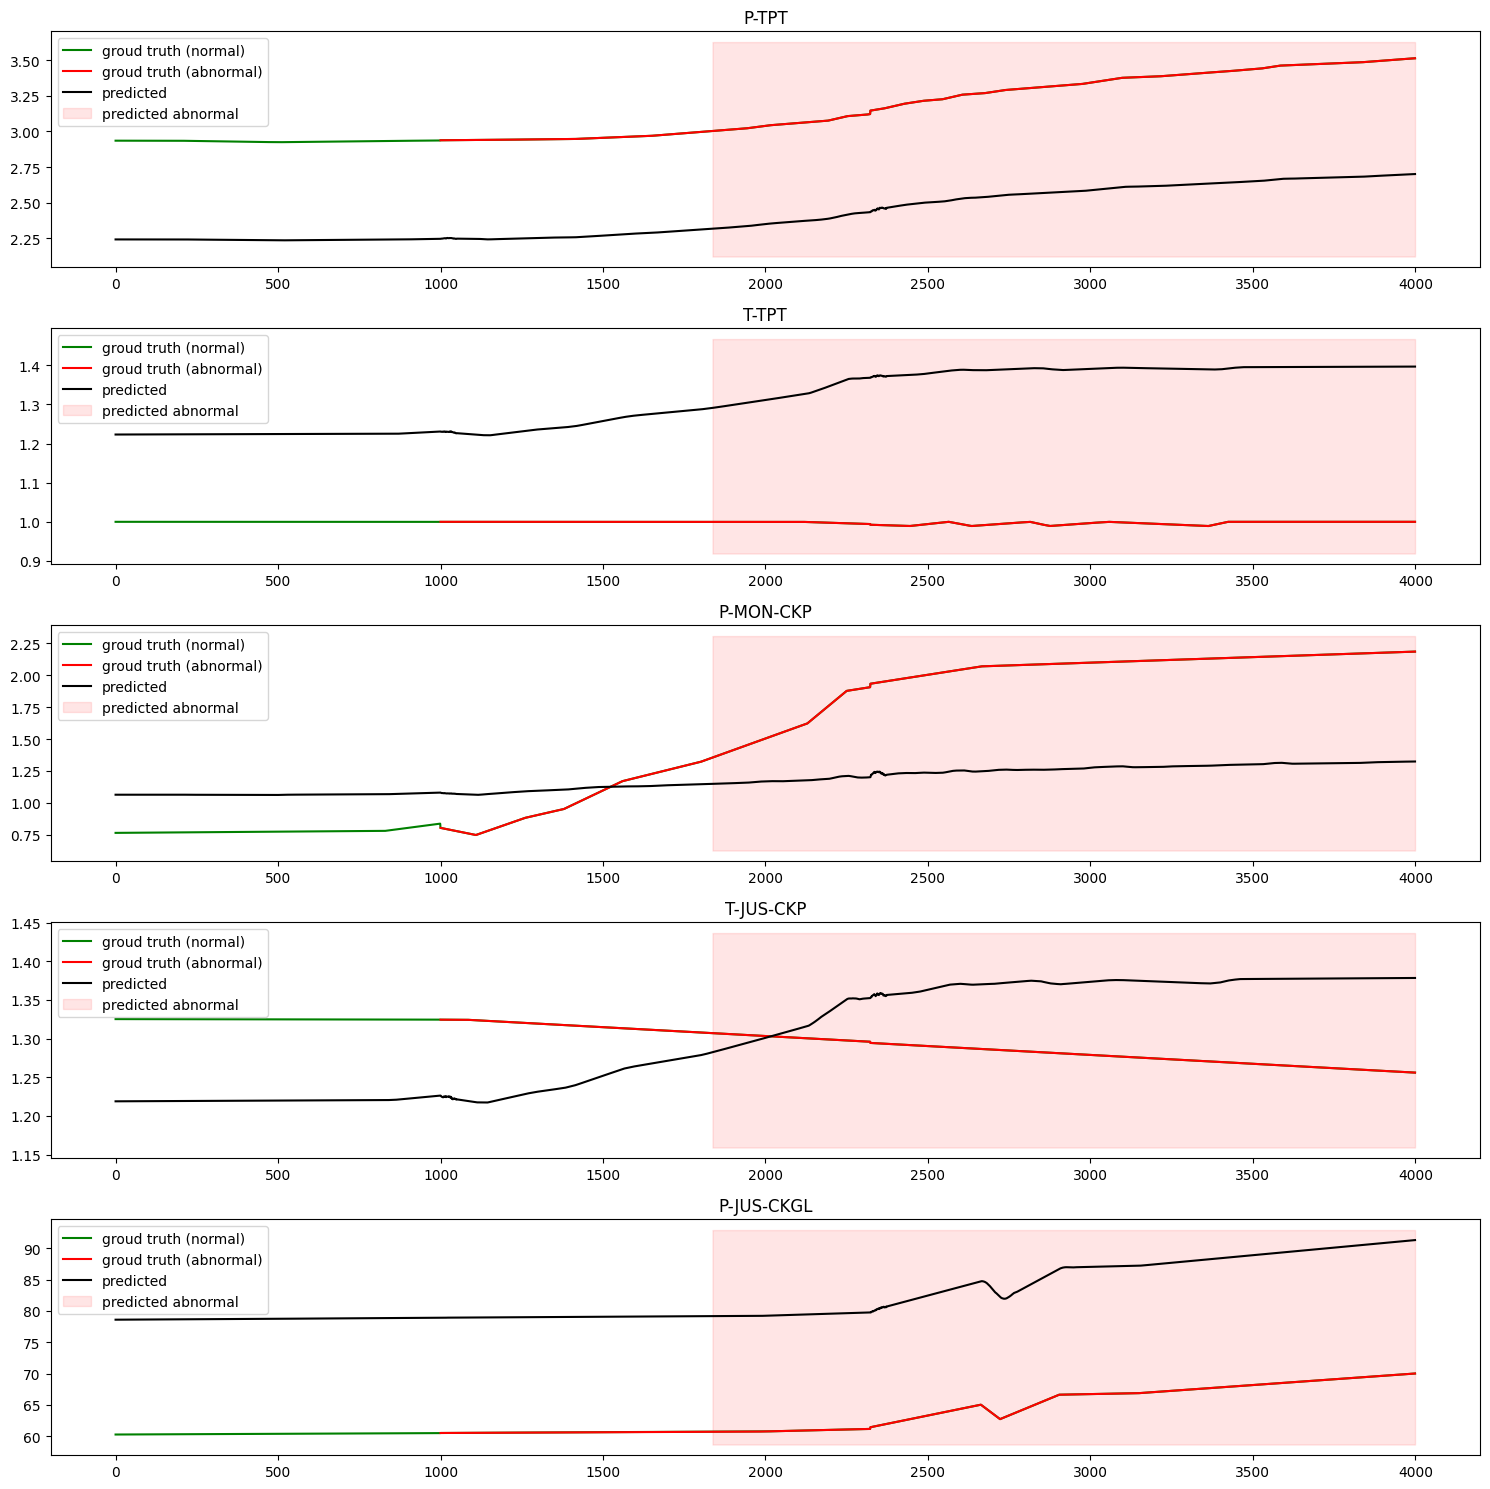

In [147]:
plot(28648, 32648)

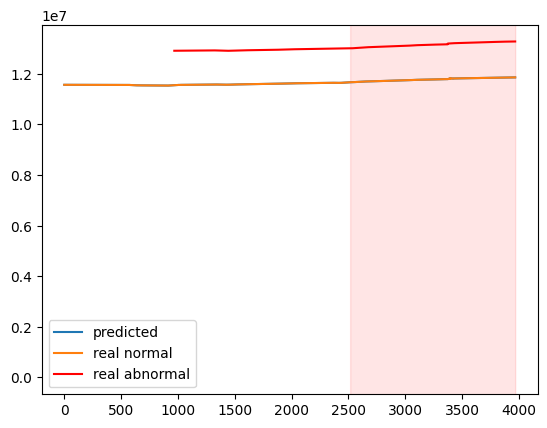

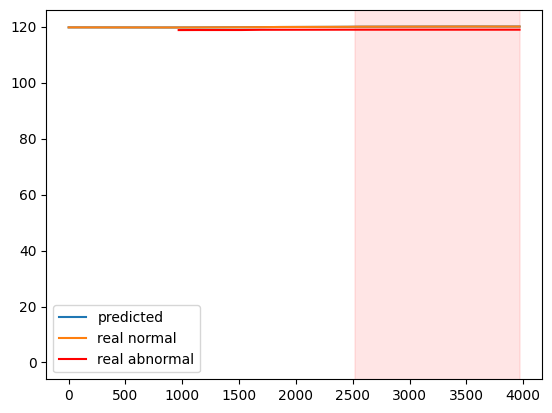

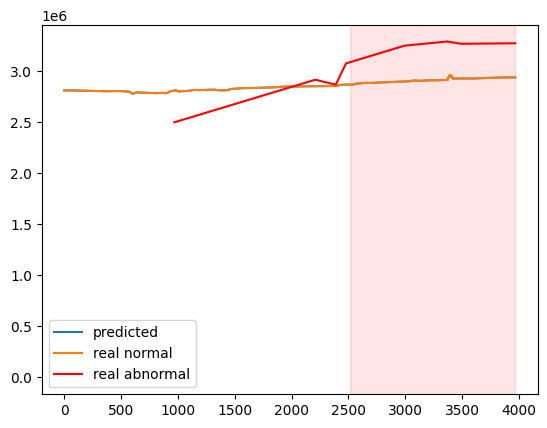

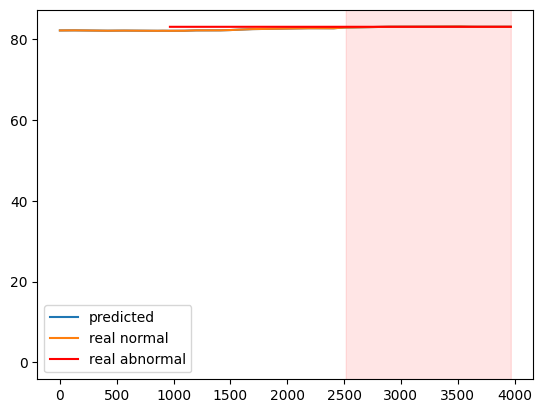

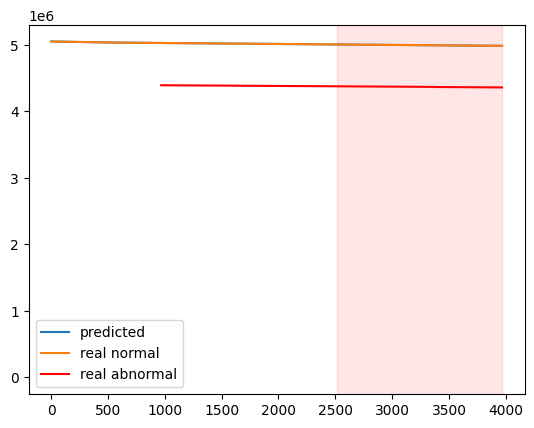

In [20]:
s, t = 14000, 17968
n = t - s
xs = np.arange(n)
# poi_predicted = 
for i in range(5):

    fig, ax = plt.subplots()

    ax.fill_between(range(n), 0, 1, where=(pred[s:t]!=0),
                    color='red', alpha=0.1, transform=ax.get_xaxis_transform())
    ax.plot(xs, test_predicted_transformed[s:t,i], '-', label='predicted')
    ax.plot(xs, test_predicted_transformed[s:t,i], '-', label='real normal')
    ax.plot(xs[(test_labels[s:t]!=0)], test_ground_transformed[s:t,i][(test_labels[s:t]!=0)], '-',color='red', label='real abnormal')
    ax.legend()

In [107]:
len(test_predicted)

65437

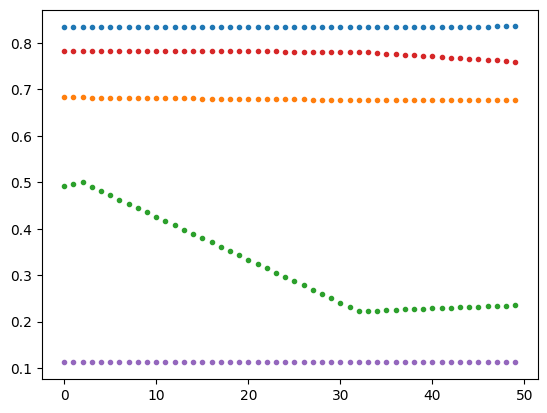

In [90]:

for i in range(5):
    xs = np.arange(50)
    ys = gdn.train_dataset.x[100,i,:]#.shape
    gt = gdn.test_dataset.y
    plt.plot(xs, ys, '.')

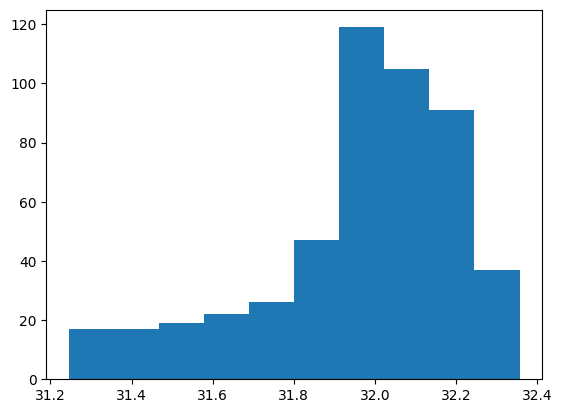

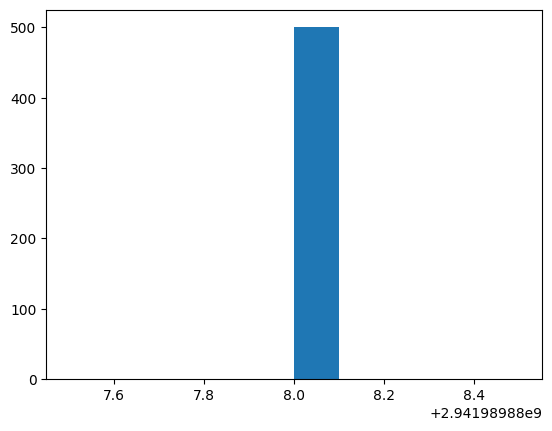

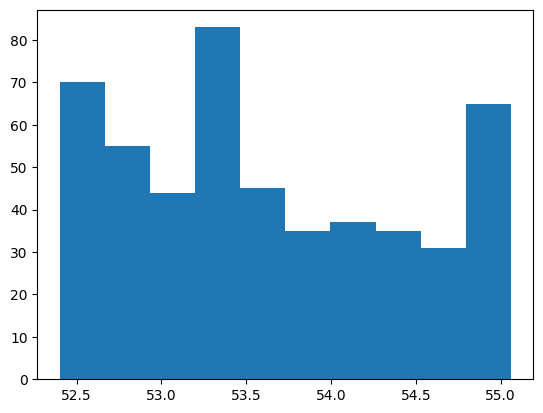

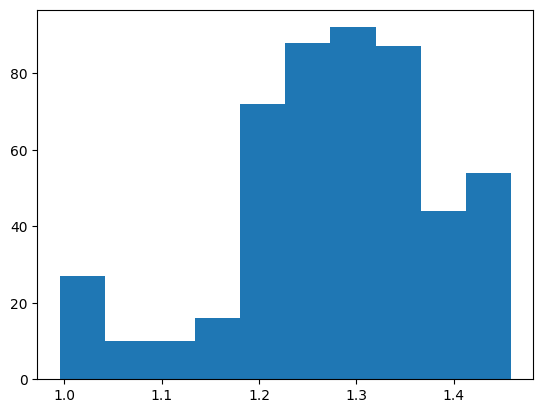

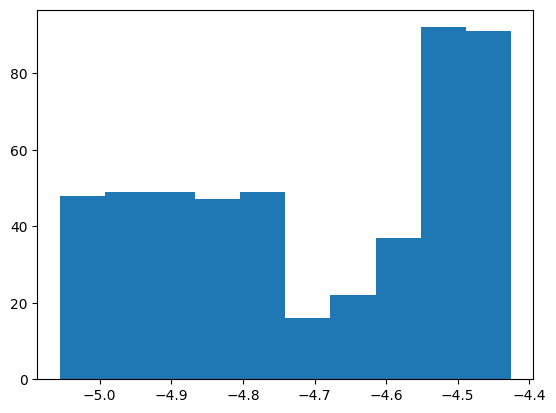

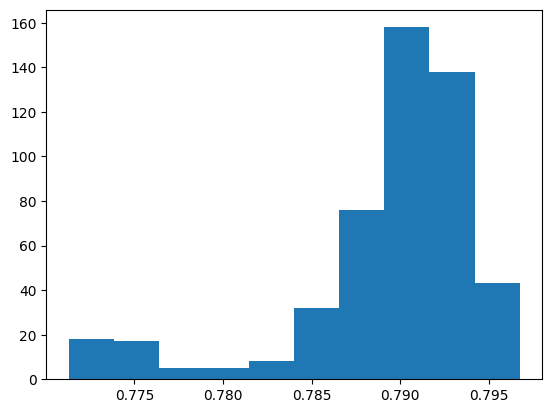

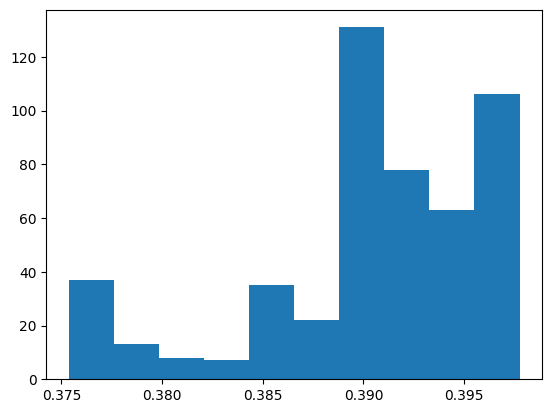

In [72]:
for i in range(7):
    plt.figure()
    plt.hist(np.array(gdn.test_dataset.x)[:500,i,0])